<a href="https://colab.research.google.com/github/Juanolguin21/DATA3/blob/main/Olguin_Juan_Manuel_Data3_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISIS DE TWEETS DE ELON MUSK**



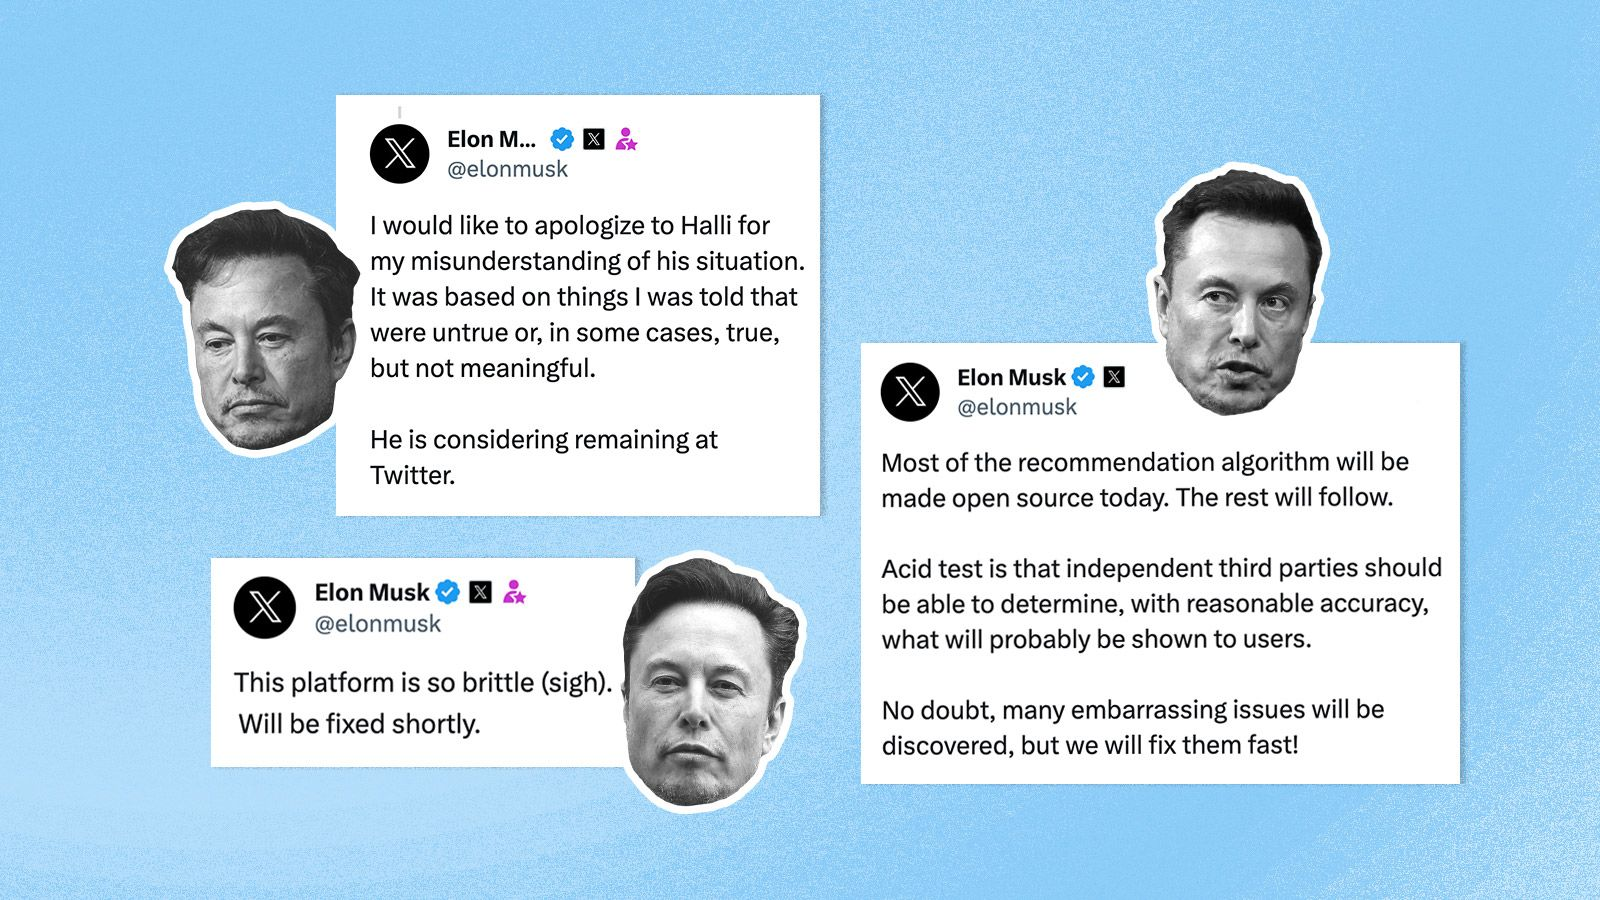

In [ ]:
!python -m spacy download es_core_news_sm
! pip install -U symspellpy
import nltk # importar natural language toolkit
nltk.download('punkt')
nltk.download('stopwords') # modulo para descargar stopwords en diferentes idiomas
nltk.download('wordnet')
from nltk.corpus import stopwords
import pandas as pd
import numpy  as np
import re
import string
import plotly
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
import time
import spacy
import es_core_news_sm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from wordcloud import WordCloud
import pickle
from symspellpy import SymSpell
import pkg_resources
from symspellpy import SymSpell, Verbosity

In [ ]:
!python -m spacy download es_core_news_md

In [3]:
import es_core_news_md
nlp = es_core_news_md.load()

In [4]:
import os
from collections import Counter

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd

from pylab import rcParams
from wordcloud import WordCloud
from nltk import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

rcParams['figure.figsize'] = 30, 60
%matplotlib inline

# Lectura de datos y analisis basico

In [5]:
import pandas as pd
elon_reviews = pd.read_csv('/content/elon_musk_tweets.csv')

elon_reviews.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1544379368478212100,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240855,115,13503,True,2022-07-05 17:55:09+00:00,@BillyM2k I find the gold toe sock – inevitabl...,NaN,Twitter for iPhone,335,6542,False
1,1544377493263720450,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:47:42+00:00,"Sock Con, the conference for socks",NaN,Twitter for iPhone,1451,30753,False
2,1544377130590552064,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:46:15+00:00,Always something new for the magazine cover an...,NaN,Twitter for iPhone,1284,28610,False
3,1544375575724400645,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:40:05+00:00,@ExplainThisBob This guy gets it,NaN,Twitter for iPhone,131,3640,False
4,1544375148605853699,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:38:23+00:00,Sock tech is so advanced that you can get pret...,NaN,Twitter for iPhone,1191,23790,False


In [6]:
elon_reviews.shape

(5904, 16)

VADER (Valence Aware Dictionary and sEntiment Reasoner) es una herramienta de análisis de sentimientos basada en un léxico y reglas, especialmente diseñada para los sentimientos expresados en redes sociales.

In [7]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

df = pd.read_csv('/content/elon_musk_tweets.csv')

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    # Determine sentiment based on the compound score
    if scores['compound'] >= 0.05:
        return "Positive"
    elif scores['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['text'].apply(get_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


TWEETS SENTIMIENTOS REFLEJADOS

In [8]:
print(df['sentiment'].value_counts())


sentiment
Positive    2468
Neutral     2416
Negative    1020
Name: count, dtype: int64


TWEETS NEGATIVOS

In [9]:
negative_tweets = df[df['sentiment'] == 'Negative']
print("Negative Tweets:\n", negative_tweets['text'])

Negative Tweets:
 0       @BillyM2k I find the gold toe sock – inevitabl...
11      Without a common goal, \nhumanity will fight i...
13      @AlexBerenson @Twitter Can you say more about ...
19      @WholeMarsBlog Also, being ruggedized for rele...
20      @WholeMarsBlog No, it’s dual, high performance...
                              ...                        
5852       @TitterDaily No restrictions on this platform!
5857                          @shellenberger Trend is bad
5865    @RepJeffries What nefarious actions are they t...
5893    @jordanbpeterson “gender-affirming care for mi...
5894            @jordanbpeterson @BlackRock Major problem
Name: text, Length: 1020, dtype: object


TWEETS POSITIVOS

In [10]:
positive_tweets = df[df['sentiment'] == 'Positive']
print("Positive Tweets:\n", positive_tweets['text'])

Positive Tweets:
 4       Sock tech is so advanced that you can get pret...
5         I must confess to a penchant for creative socks
7       @TonyadeVitti @historydefined His success was ...
8       @historydefined While bleak posts maybe genera...
9       @mishaboar @boringcompany Supporting Doge wher...
                              ...                        
5890                           @EndWokeness Not oppressed
5895                            @LibertyCappy Interesting
5896                 @TheBabylonBee Worked like a charm 💫
5899                       @JonErlichman He’s not wrong …
5901                                        @sriramk Cool
Name: text, Length: 2468, dtype: object


In [ ]:
pip install matplotlib seaborn


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

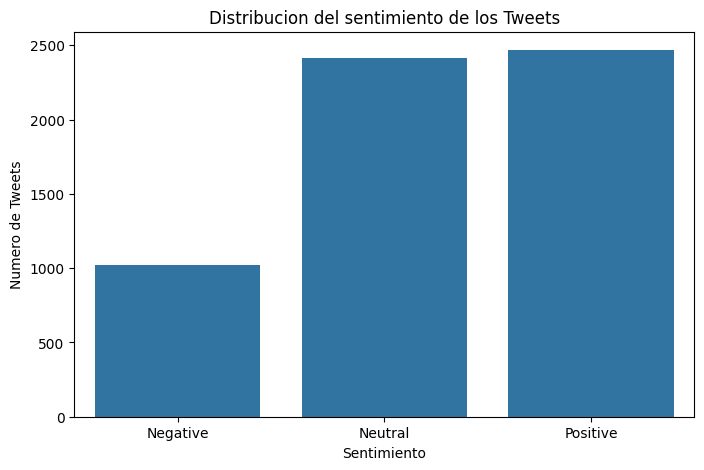

In [13]:
rcParams['figure.figsize'] = 8, 5


sns.countplot(x='sentiment', data=df)
plt.title('Distribucion del sentimiento de los Tweets')
plt.xlabel('Sentimiento')
plt.ylabel('Numero de Tweets')
plt.show()

In [14]:
df['date'] = pd.to_datetime(df['date'])


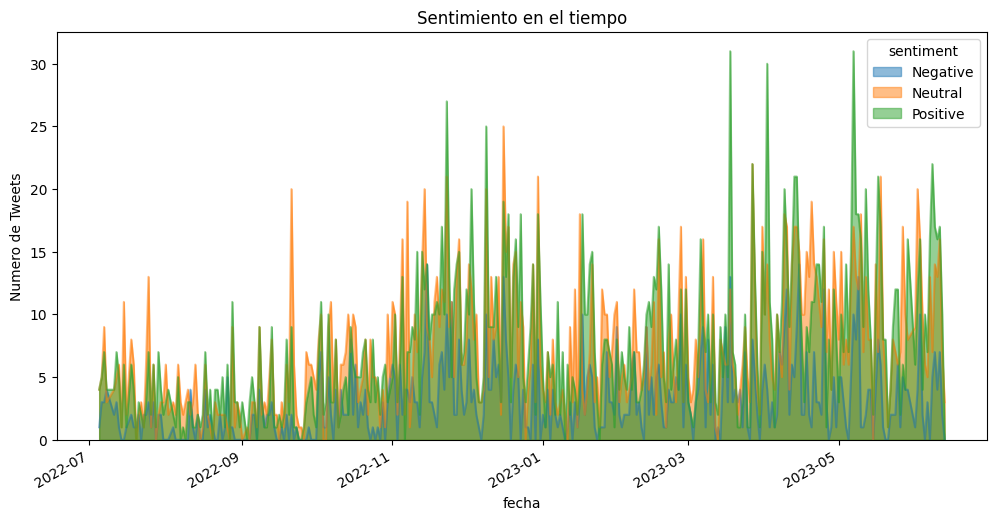

In [15]:
sentiment_over_time = df.groupby(pd.Grouper(key='date', freq='D'))['sentiment'].value_counts().unstack().fillna(0)

sentiment_over_time.plot(kind='area', stacked=False, figsize=(12, 6))
plt.title('Sentimiento en el tiempo')
plt.xlabel('fecha')
plt.ylabel('Numero de Tweets')
plt.show()

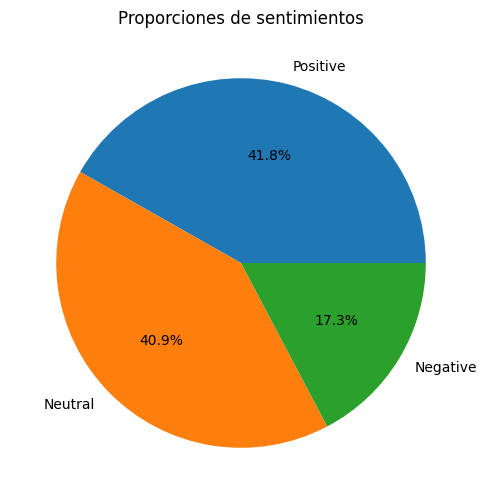

In [16]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Proporciones de sentimientos')
plt.ylabel('')  # Remove the default 'Sentiment' label
plt.show()

Este gráfico puede ayudar a visualizar si existe una relación entre el número de retweets y favoritos que recibe un tweet, y si el sentimiento juega un papel importante.

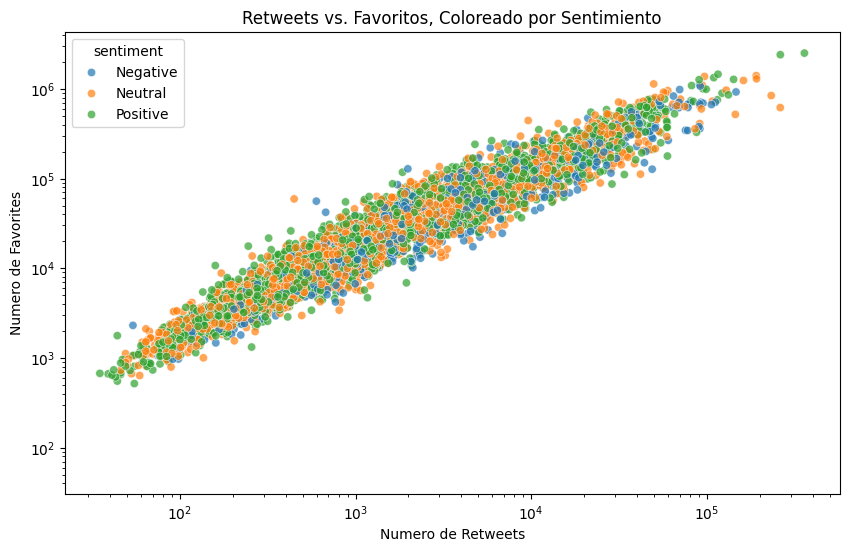

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='retweets', y='favorites', hue='sentiment', data=df, alpha=0.7)
plt.title('Retweets vs. Favoritos, Coloreado por Sentimiento')
plt.xlabel('Numero de Retweets')
plt.ylabel('Numero de Favorites')
plt.xscale('log') # Use log scale for better visualization if the range is very wide
plt.yscale('log')
plt.show()

Ver qué plataforma se correlaciona con ciertos sentimientos.



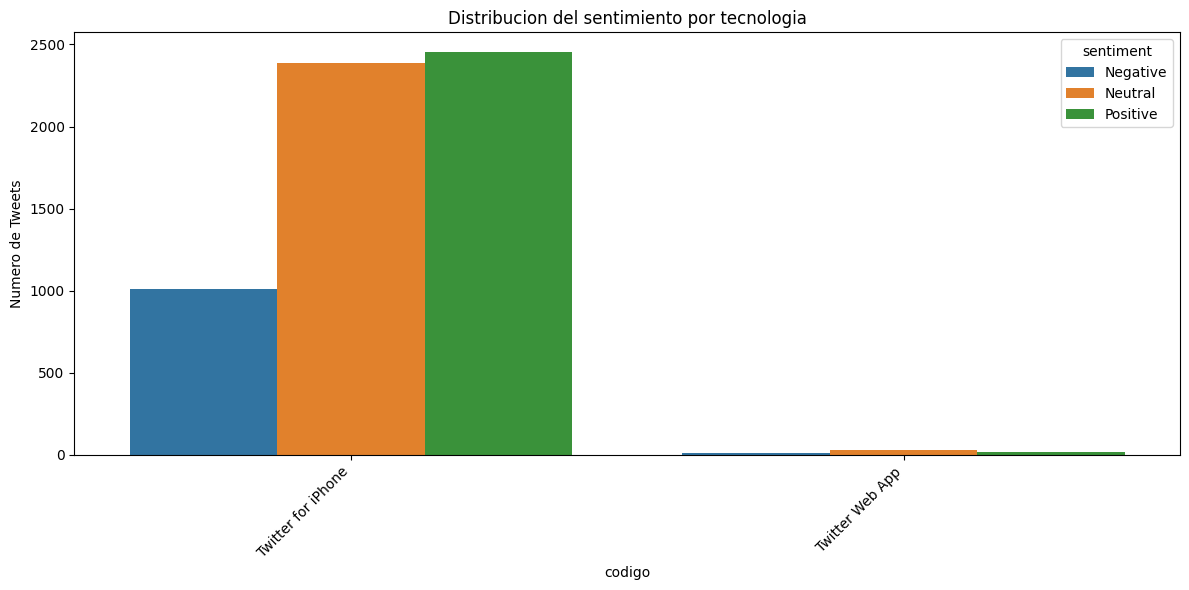

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x='source', hue='sentiment', data=df)
plt.title('Distribucion del sentimiento por tecnologia')
plt.xlabel('codigo')
plt.ylabel('Numero de Tweets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Miremos la distribucion del numero de palabras por tweet

Text(0, 0.5, 'Frecuencia')

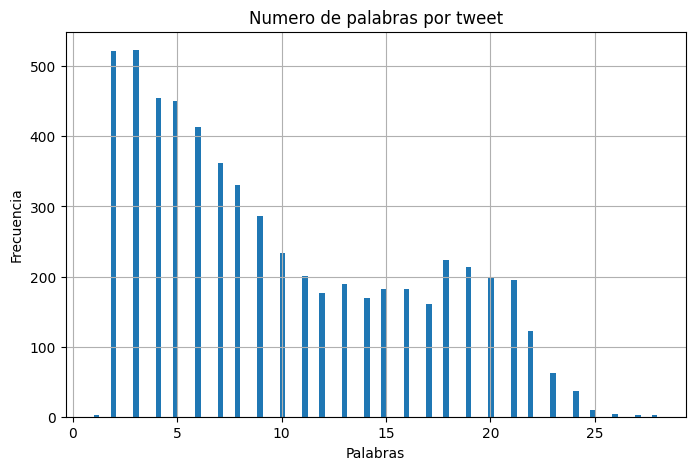

In [19]:

import pandas as pd
elon_reviews = pd.read_csv('/content/elon_musk_tweets.csv')

elon_reviews.head()

rcParams['figure.figsize'] = 8, 5

words_per_review = elon_reviews.text.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100)
plt.title('Numero de palabras por tweet')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')

In [20]:
words_per_review.mean()

np.float64(9.88431571815718)

Distribucion de retweets a usuarios
verificados o tweets sin arrobar

In [21]:
elon_reviews.user_verified.value_counts()

,count
user_verified,
True,4067
False,1837


In [22]:
percent_val = 100 * elon_reviews.user_verified.value_counts()/elon_reviews.shape[0]
percent_val

,count
user_verified,
True,68.885501
False,31.114499


Text(0, 0.5, 'Porcentaje (%)')

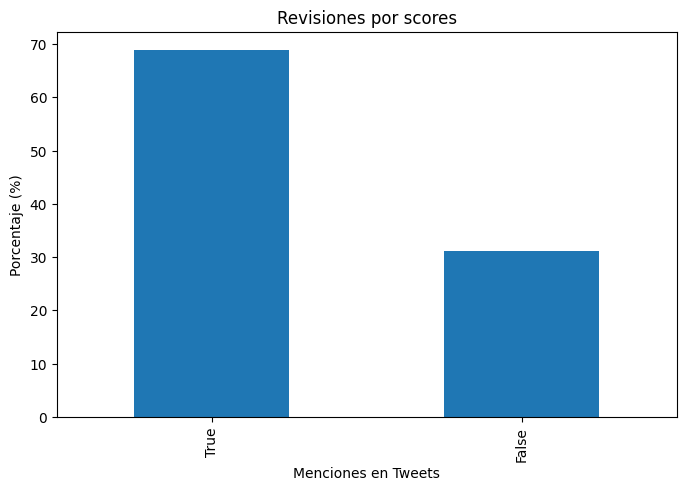

In [24]:
rcParams['figure.figsize'] = 8, 5

percent_val.plot.bar()
plt.title('Revisiones por scores')
plt.xlabel('Menciones en Tweets')
plt.ylabel('Porcentaje (%)')

RETWEETS DE ELON @ a alguien

In [25]:
elon_reviews.user_description.value_counts()

,count
user_description,
nothing,616
"Mars & Cars, Chips & Dips",435
Twitter Complaint Hotline Operator,147
Perfume Salesman,82
Chief Twit,69
handsome/brilliant,44
State-Affiliated Media,29


In [26]:
percent_val = 100 * elon_reviews.user_description.value_counts()/elon_reviews.shape[0]
percent_val

,count
user_description,
nothing,10.433604
"Mars & Cars, Chips & Dips",7.367886
Twitter Complaint Hotline Operator,2.489837
Perfume Salesman,1.388889
Chief Twit,1.168699
handsome/brilliant,0.745257
State-Affiliated Media,0.491192


# Wordcloud

In [27]:
elon_reviews['text']

,text
0,@BillyM2k I find the gold toe sock – inevitabl...
1,"Sock Con, the conference for socks"
2,Always something new for the magazine cover an...
3,@ExplainThisBob This guy gets it
4,Sock tech is so advanced that you can get pret...
...,...
5899,@JonErlichman He’s not wrong …
5900,"@alifarhat79 Guys, I think I maybe took too mu..."
5901,@sriramk Cool
5902,@cb_doge Time to complete the circle


403034


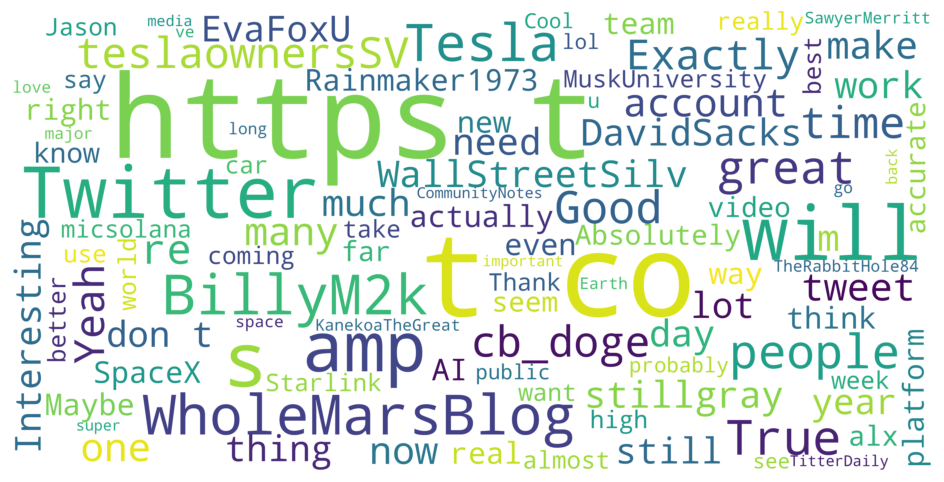

In [28]:
word_cloud_text = ''.join(elon_reviews.text)
print(len(word_cloud_text))

wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=400
).generate(word_cloud_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

El wordcloud muestra que hat muchos tweets que hablan sobre temas de IT (HTTPS, TESLA, IA, SPACEX, TWITTER, STARLINK), tambien se observan otras palabras como great, exactly y people

# Estandarizacion de retweets para analisis de apoyo


Para propositos del analisis de sentimiento convertiremos todos los retweets en valores binarios con las siguientes reglas:
- retweets > 500 seran convertidos a 1 (positivo)
- retweets < 500 seran convertidos a 0 (negativo)
- retweets < 100 seran removidos del analisis

In [29]:
elon_reviews['Sentiment_rating'] = np.where(elon_reviews.retweets > 500, 'Tweet Liked', 'Debajo de los 500 Retweets')
elon_reviews['Sentiment_rating'].value_counts()

,count
Sentiment_rating,
Tweet Liked,3949
Debajo de los 500 Retweets,1955


!= negativo

Text(0, 0.5, 'Frecuencia')

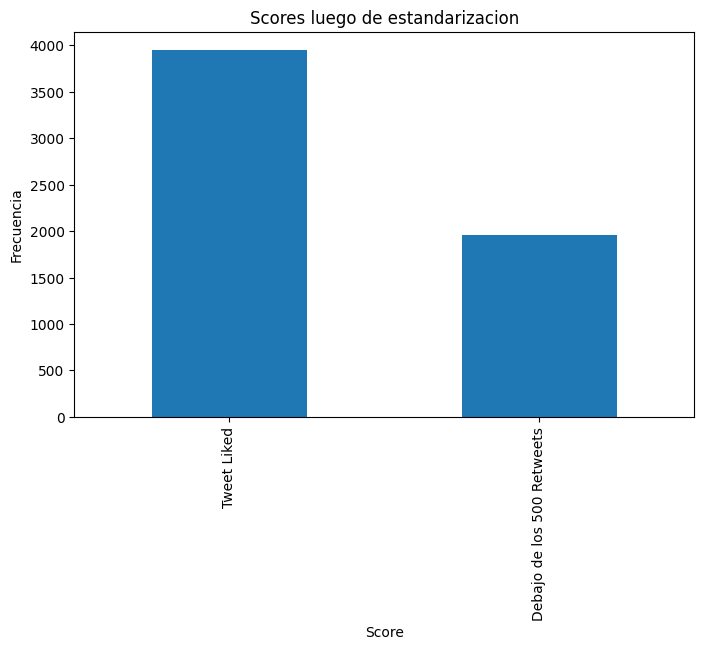

In [30]:
rcParams['figure.figsize'] = 8, 5
elon_reviews.Sentiment_rating.value_counts().plot.bar()
plt.title('Scores luego de estandarizacion')
plt.xlabel('Score')
plt.ylabel('Frecuencia')

# Preprocesamiento

Recordemos que el preprocesamiento de texto y la normalizacion es crucial antes de desarrollar un modelo de NLP, algunos pasos importantes son:
1. Convertir palabras a minusculas
2. remover caracteres especiales
3. remover stopwords y palabras de alta frecuencia
4. Stemming y lemantizacion

Procedamos con la primera fase

In [31]:
elon_reviews['reviews_text_new'] = elon_reviews.text.apply(lambda x: x.lower())

Las siguientes fases:

In [32]:
import nltk
nltk.download('punkt_tab', download_dir='/usr/local/share/nltk_data')

token_lists = [each.split() for each in elon_reviews.text]
tokens = [item for sublist in token_lists for item in sublist]
print("Numero de tokens unicos antes: ", len(set(tokens)))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Numero de tokens unicos antes:  14283


NORMALIZACION

In [33]:

token_lists = [word_tokenize(each) for each in elon_reviews.text]
tokens = [item for sublist in token_lists for item in sublist]
print("Numero de tokens unicos antes: ", len(set(tokens)))

token_lists_lower = [word_tokenize(each) for each in elon_reviews.reviews_text_new]
tokens_lower = [item for sublist in token_lists_lower for item in sublist]
print("Numero de tokens unicos nuevos: ", len(set(tokens_lower)))

Numero de tokens unicos antes:  11696
Numero de tokens unicos nuevos:  10597


In [34]:
(22865-27899)/27899

-0.18043657478762679

El numero de tokens han bajado en cerca del 18% con la normalizacion

## stopwords y palabras de alta/baja frecuencia

Vamos a remover estas palabras

In [35]:
import nltk
nltk.download('stopwords')

noise_words = []
stopwords_corpus = nltk.corpus.stopwords
eng_stop_words = stopwords_corpus.words('english')
noise_words.extend(eng_stop_words)
print(len(noise_words))
noise_words

198


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [36]:
one_percentile = int(len(set(tokens)) * 0.01)
top_1_percentile = Counter(tokens).most_common(one_percentile)
top_1_percentile[:10]

[('@', 7140),
 (',', 1689),
 ('.', 1409),
 (':', 1361),
 ('https', 1289),
 ('the', 1269),
 ('is', 1264),
 ('to', 1227),
 ('’', 957),
 ('a', 949)]

Text(0, 0.5, 'Frecuencia')

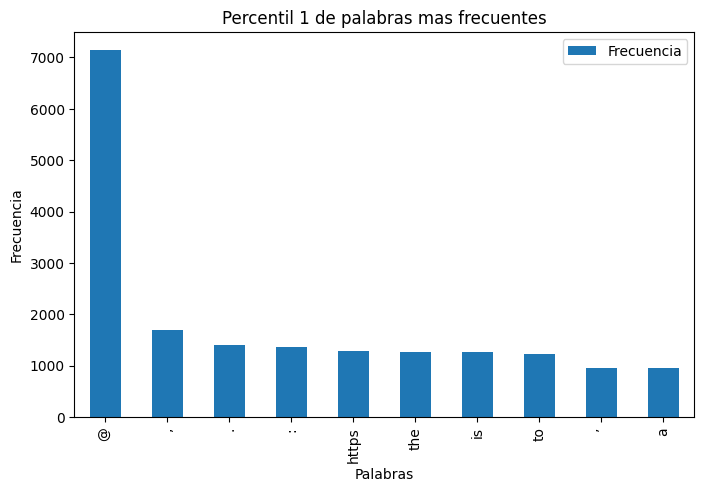

In [37]:
pd.DataFrame(top_1_percentile[:10], columns=['Palabras','Frecuencia']).set_index('Palabras').plot(kind='bar')
plt.title('Percentil 1 de palabras mas frecuentes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')

# Creacion de modelo de ML

In [38]:
elon_reviews[['text','user_description','Sentiment_rating']].head(5)

,text,user_description,Sentiment_rating
0,@BillyM2k I find the gold toe sock – inevitabl...,"Mars & Cars, Chips & Dips",Debajo de los 500 Retweets
1,"Sock Con, the conference for socks","Mars & Cars, Chips & Dips",Tweet Liked
2,Always something new for the magazine cover an...,"Mars & Cars, Chips & Dips",Tweet Liked
3,@ExplainThisBob This guy gets it,"Mars & Cars, Chips & Dips",Debajo de los 500 Retweets
4,Sock tech is so advanced that you can get pret...,"Mars & Cars, Chips & Dips",Tweet Liked


Las variables independientes o características del modelo se derivan del texto de revisión. Previamente, discutimos cómo podemos usar **n-grams** para crear características, y específicamente cómo la bolsa de palabras es la interpretación más simple de estos n-gramas, sin tener en cuenta el orden y el contexto por completo y solo enfocándonos en la frecuencia/recuento. Usemos eso como punto de partida.

# Bag of words

CountVectorizer es una clase de Python que da cuenta automáticamente de ciertos pasos de preprocesamiento, como la eliminación de palabras vacías, la derivación, la creación de n-gramas y la tokenización de palabras:

In [39]:
# Creacion de metodo para stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

Usemos esto para crear una bolsa de palabras de los tweets, excluyendo las palabras irrelevantes que identificamos anteriormente:

In [40]:
# Creacion de un objeto tipo CountVectorizer
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=noise_words,
    ngram_range=(1, 1)
)

Una vez que se prepara la bolsa de palabras, el conjunto de datos debe dividirse en conjuntos de entrenamiento y de prueba. También podríamos dividir los datos después de vectorizarlos, pero es útil dividir los datos lo antes posible en el proceso. Esto significa que una vez que hemos generado nuestras predicciones, podemos compararlas más fácilmente con los textos originales, antes de que hayan sido preprocesadas y vectorizadas.

In [41]:
reviews_train, reviews_test = train_test_split(elon_reviews, test_size=0.2, random_state=0)

In [42]:
X_train_bow = bow_counts.fit_transform(reviews_train.reviews_text_new)
X_test_bow = bow_counts.transform(reviews_test.reviews_text_new)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'m", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


Tengan en cuenta que llamamos a ```fit_transform``` para vectorizar nuestro conjunto de entrenamiento y ```transform``` para vectorizar nuestro conjunto de prueba. Esto genera las asignaciones de vectorización solo en los datos del conjunto de entrenamiento, que es una restricción a la que nos enfrentaríamos en un problema del mundo real (no tener acceso a los datos de prueba durante el tiempo de entrenamiento).

Por lo tanto, puede haber algunas palabras en el conjunto de prueba que no sabemos cómo vectorizar y se omitirán.

In [43]:
y_train_bow = reviews_train['Sentiment_rating']
y_test_bow = reviews_test['Sentiment_rating']

In [44]:
y_test_bow.value_counts() / y_test_bow.shape[0]

,count
Sentiment_rating,
Tweet Liked,0.675699
Debajo de los 500 Retweets,0.324301


Los datos de prueba contienen 67% de opiniones positivas. El modelo de predicción más simple que podríamos pensar sería uno que prediga "positivo" para cada entrada. Llamaríamos a esto un modelo "ingenuo", y constituye una línea de base útil. En este caso, dicho modelo obtendría un 67 % de precisión, por lo que podemos considerarlo como una puntuación de referencia que nuestro modelo de aprendizaje automático debe superar.

## Modelo de regresion logistica

In [45]:
# Entrenar el modelo
lr_model_all = LogisticRegression(C=1, solver="liblinear")
lr_model_all.fit(X_train_bow, y_train_bow)

# Predecir el output
test_pred_lr_prob = lr_model_all.predict_proba(X_test_bow)
test_pred_lr_all = lr_model_all.predict(X_test_bow)

print("F1 score: ", f1_score(y_test_bow, test_pred_lr_all, labels=['Debajo de los 500 Retweets', 'Tweet Liked'], pos_label='Tweet Liked'))
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_lr_all) * 100)

F1 score:  0.8379821958456973
Accuracy:  76.8839966130398


In [46]:
test_pred_lr_prob

array([[0.38494343, 0.61505657],
       [0.62098614, 0.37901386],
       [0.22450875, 0.77549125],
       ...,
       [0.44392269, 0.55607731],
       [0.83099399, 0.16900601],
       [0.15142507, 0.84857493]])

In [47]:
probabilities = [each[1] for each in test_pred_lr_prob]

In [48]:
predictions = pd.DataFrame()
predictions['text'] = reviews_test['text']
predictions['Actual_Score'] = reviews_test['user_description']
predictions['Sentiment_rating'] = reviews_test['Sentiment_rating']
predictions['Predicted_sentiment'] = test_pred_lr_all
predictions['Predicted_probability'] = probabilities

In [49]:
predictions.head(5)

,text,Actual_Score,Sentiment_rating,Predicted_sentiment,Predicted_probability
828,@stillgray Are there citizens of nations who a...,NaN,Debajo de los 500 Retweets,Tweet Liked,0.615057
3646,@BillyM2k Heard good things about Atomic Heart,NaN,Debajo de los 500 Retweets,Debajo de los 500 Retweets,0.379014
5658,@WallStreetSilv This doesn’t make sense,NaN,Tweet Liked,Tweet Liked,0.775491
2247,@DavidSacks The journalists were aware of the ...,NaN,Tweet Liked,Tweet Liked,0.926821
464,@EvasTeslaSPlaid @paraga Bot block party,NaN,Tweet Liked,Tweet Liked,0.601497


In [50]:
accuracy_score(predictions['Sentiment_rating'], predictions['Predicted_sentiment'])

0.768839966130398

In [51]:
predictions[
    predictions['Predicted_sentiment'] != predictions['Sentiment_rating']
].sort_values(by=["Predicted_probability"]).head(3)

,text,Actual_Score,Sentiment_rating,Predicted_sentiment,Predicted_probability
864,@starrski71 @RenataKonkoly @EvaFoxU @kadubai11...,NaN,Tweet Liked,Debajo de los 500 Retweets,0.006487
247,@Teslarati @YahooFinance @PeteButtigieg @Tesla...,"Mars & Cars, Chips & Dips",Tweet Liked,Debajo de los 500 Retweets,0.031069
914,@RenataKonkoly @ThorstenBasch @spideycyp_155 @...,Chief Twit,Tweet Liked,Debajo de los 500 Retweets,0.037490


In [52]:
# Cambios con respecto al código anterior
# 1. Aumentar los n-gramas de solo tener 1 gramo a (1 gramo, 2 gramos, 3 gramos y 4 gramos)
# 2. Incluir las palabras vacías en las características de la bolsa de palabras
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)

X_train_bow = bow_counts.fit_transform(reviews_train.reviews_text_new)
X_test_bow = bow_counts.transform(reviews_test.reviews_text_new)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [53]:
# Observe el aumento de funciones con la inclusión de palabras vacías
X_train_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 209671 stored elements and shape (4723, 131943)>

In [54]:
# Cambios en la regresión logística
# Cambio de la sanción de regularización por defecto de l2 a l1
# Cambiando el parámetro de costo C a 0.9
lr_model_all_new = LogisticRegression(C=0.9, solver="liblinear")

In [55]:
# Entrenar el modelo
lr_model_all_new.fit(X_train_bow, y_train_bow)

# Predecir resultados
test_pred_lr_prob = lr_model_all_new.predict_proba(X_test_bow)
test_pred_lr_all = lr_model_all_new.predict(X_test_bow)

print("F1 score: ", f1_score(y_test_bow, test_pred_lr_all, labels=['Debajo de los 500 Retweets', 'Tweet Liked'], pos_label='Tweet Liked'))
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_lr_all) * 100)

F1 score:  0.8405627198124267
Accuracy:  76.96867061812024


La precisión ha saltado del 76% al 84%. Este es un ejemplo de lo que el simple ajuste de hiperparámetros y la modificación de características de entrada pueden hacer en el rendimiento general. Incluso podemos obtener características interpretables de esto en términos de lo que más contribuyó al sentimiento positivo y negativo.

## Random forest

In [56]:
rf_model_all = RandomForestClassifier(n_estimators=100)

# Entrenamiento
rf_model_all.fit(X_train_bow, y_train_bow)

# predicciones
test_pred_lr_prob = rf_model_all.predict_proba(X_test_bow)
test_pred_lr_all = rf_model_all.predict(X_test_bow)

In [57]:
print("F1 score: ", f1_score(y_test_bow, test_pred_lr_all, labels=['Debajo de los 500 Retweets', 'Tweet Liked'], pos_label='Tweet Liked'))
print("Accuracy: ", accuracy_score(y_test_bow,test_pred_lr_all)* 100)

F1 score:  0.8261102193686464
Accuracy:  72.4809483488569


Esto no es tan bueno como la regresión logística ya que de un 72% lo mejora a un 82%.

# **REDES NEURONALES**

In [ ]:
pip install pandas scikit-learn tensorflow nltk


In [61]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [62]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [63]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'http\S+|www\S+|@\S+', '', text, flags=re.MULTILINE)  # Remove URLs and mentions
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

df['cleaned_text'] = df['text'].apply(clean_text)

In [64]:
max_words = 5000  # Maximum number of words to keep
tokenizer = Tokenizer(num_words=max_words, oov_token="<UNK>")  # oov_token handles out-of-vocabulary words
tokenizer.fit_on_texts(df['cleaned_text'])

X = tokenizer.texts_to_sequences(df['cleaned_text'])
max_len = 140  # Maximum length of sequences (tweets)
X = pad_sequences(X, maxlen=max_len, padding='post', truncating='post')

In [65]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])
num_classes = len(label_encoder.classes_)

In [66]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
embedding_dim = 64
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(128)) # Increase LSTM units for better learning
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [68]:
epochs = 5
batch_size = 32

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 39s 270ms/step - accuracy: 0.3972 - loss: 1.0518 - val_accuracy: 0.4017 - val_loss: 1.0403
Epoch 2/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 37s 241ms/step - accuracy: 0.4185 - loss: 1.0403 - val_accuracy: 0.4017 - val_loss: 1.0483
Epoch 3/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 28s 210ms/step - accuracy: 0.4006 - loss: 1.0409 - val_accuracy: 0.4017 - val_loss: 1.0443
Epoch 4/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 42s 215ms/step - accuracy: 0.4244 - loss: 1.0383 - val_accuracy: 0.4017 - val_loss: 1.0398
Epoch 5/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 41s 213ms/step - accuracy: 0.4104 - loss: 1.0265 - val_accuracy: 0.4017 - val_loss: 1.0382


In [69]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) # Get the class with highest probability

print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


Accuracy: 38.70
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       207
     Neutral       0.00      0.00      0.00       517
    Positive       0.39      1.00      0.56       457

    accuracy                           0.39      1181
   macro avg       0.13      0.33      0.19      1181
weighted avg       0.15      0.39      0.22      1181



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


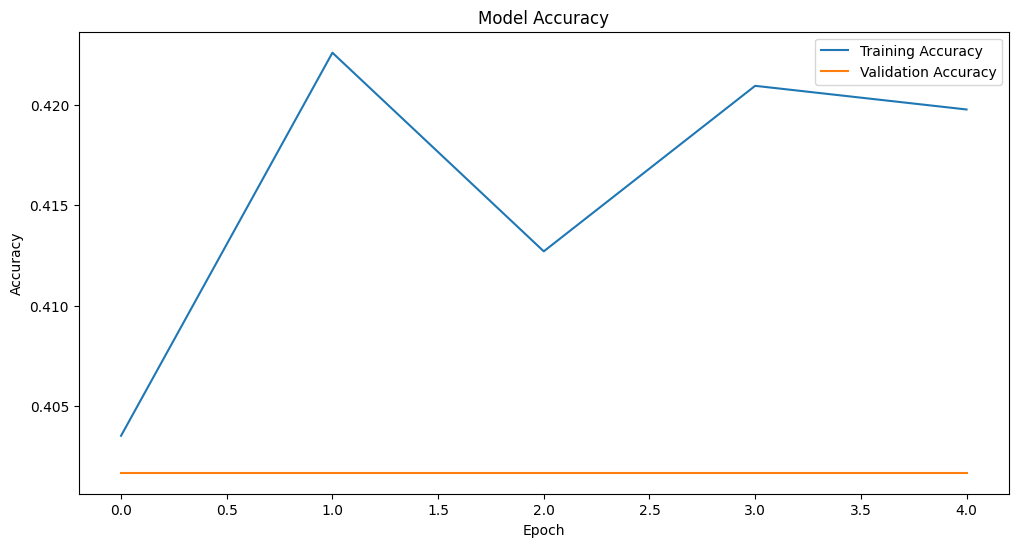

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

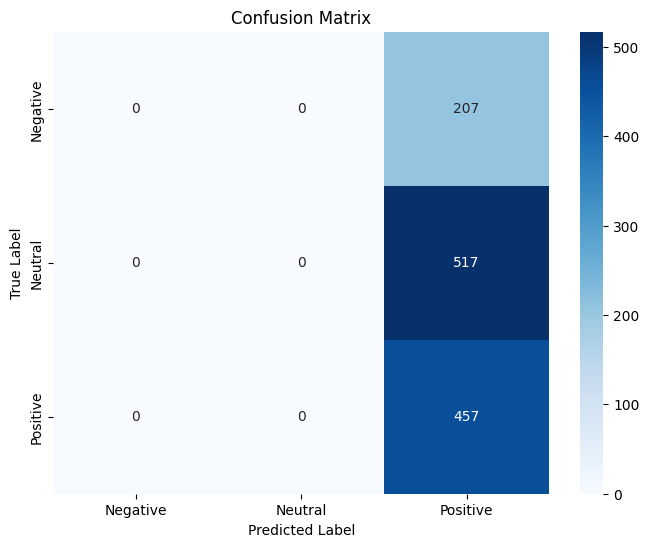

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Explicación del Código**

Preprocesamiento de Datos: Limpia los tweets eliminando URLs, menciones, caracteres especiales y palabras vacías.

Tokenizador: Transforma el texto en secuencias numéricas que la red neuronal puede entender.

Relleno (Padding): Asegura que todas las secuencias tengan la misma longitud.

Capa de Inserción (Embedding Layer): Crea una representación vectorial densa para cada palabra, capturando relaciones semánticas.

Capa LSTM: Procesa las secuencias y aprende dependencias a largo plazo en el texto.

Capa Densa: La capa final realiza la predicción del sentimiento (Positivo, Negativo, Neutro).

Historial de Entrenamiento: Muestra el progreso del entrenamiento en términos de precisión.

# Matriz de Confusión: ayuda a visualizar el rendimiento de la Red Neuronal.

## **ANALIZEMOS AHORA DENTRO DE LOS TWEETS POSITIVOS CUALES SON LAS PALABRAS MAS COMUNES PARA FINALIZAR ESTE ANALISIS!**

In [ ]:
df = pd.read_csv("/content/elon_musk_tweets.csv")

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    # Determine sentiment based on the compound score
    if scores['compound'] >= 0.05:
        return "Positive"
    elif scores['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['text'].apply(get_sentiment)
positive_tweets = df[df['sentiment'] == 'Positive']['text']
print("Positive Tweets:\n", positive_tweets.to_string())

In [77]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'http\S+|www\S+|@\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^a-zA-Z]', ' ', text, flags=re.MULTILINE)
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

positive_tweets_cleaned = positive_tweets.apply(clean_text)

all_words = ' '.join(positive_tweets_cleaned).split()
word_counts = Counter(all_words)

most_common_words = word_counts.most_common(20) # Adjust the number as needed

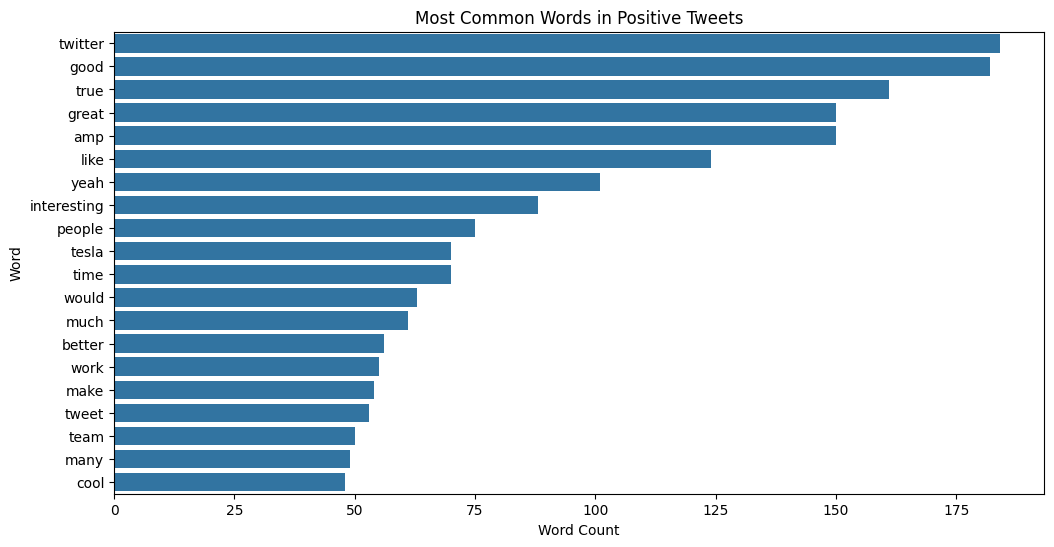

In [78]:
words, counts = zip(*most_common_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(words))
plt.title('Most Common Words in Positive Tweets')
plt.xlabel('Word Count')
plt.ylabel('Word')
plt.show()